In [1]:
import pandas as pd

brent_oil_df_raw = pd.read_csv("data/GasOtherFutures/individual_data/Brent_Crude_Oil_data.csv")
display(brent_oil_df_raw)

,date,open,high,low,close,volume
0,2007-07-30,75.849998,76.529999,75.440002,75.739998,2575
1,2007-07-31,75.699997,77.169998,75.669998,77.050003,3513
2,2007-08-01,77.000000,77.059998,74.860001,75.349998,3930
3,2007-08-02,75.220001,76.209999,74.269997,75.760002,6180
4,2007-08-03,75.389999,76.000000,74.529999,74.750000,4387
...,...,...,...,...,...,...
4130,2024-03-19,86.849998,87.709999,86.489998,87.379997,30045
4131,2024-03-20,87.220001,87.349998,85.580002,85.949997,35304
4132,2024-03-21,86.160004,86.639999,85.050003,85.779999,23829
4133,2024-03-22,85.550003,86.150002,85.110001,85.430000,14778


In [2]:
import numpy as np

data = np.full((brent_oil_df_raw['date'].size, 2), np.nan)
columns = ['Original', 'Predicted']
brent_oil_close_df = pd.DataFrame(
    data,
    index=pd.to_datetime(brent_oil_df_raw['date']),
    columns=columns)
brent_oil_close_df['Original'] =\
    brent_oil_df_raw['close'].to_numpy()
brent_oil_close_df

,Original,Predicted
date,,
2007-07-30,75.739998,NaN
2007-07-31,77.050003,NaN
2007-08-01,75.349998,NaN
2007-08-02,75.760002,NaN
2007-08-03,74.750000,NaN
...,...,...
2024-03-19,87.379997,NaN
2024-03-20,85.949997,NaN
2024-03-21,85.779999,NaN


In [3]:
# Using business day frequency
brent_oil_close_df = brent_oil_close_df.asfreq('B')
brent_oil_close_df.interpolate('time', inplace=True)
brent_oil_close_df

,Original,Predicted
date,,
2007-07-30,75.739998,NaN
2007-07-31,77.050003,NaN
2007-08-01,75.349998,NaN
2007-08-02,75.760002,NaN
2007-08-03,74.750000,NaN
...,...,...
2024-03-19,87.379997,NaN
2024-03-20,85.949997,NaN
2024-03-21,85.779999,NaN


In [4]:
from pmdarima.arima import auto_arima

brent_oil_arima_model = auto_arima(
    brent_oil_close_df['Original'][:-40],
    seasonal=True,
    m=7,
    stepwise=True,
    trace=True)
brent_oil_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=16414.835, Time=7.68 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=16417.297, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=16420.551, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=16420.522, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=16415.301, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=16411.939, Time=7.03 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=16411.093, Time=1.74 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=16411.895, Time=5.57 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=16420.347, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=16420.233, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=16403.658, Time=1.40 sec
 ARIMA(3,1,2)(1,0,0)[7] intercept   : AIC=16405.643, Time=6.31 sec
 ARIMA(3,1,2)(0,0,1)[7] intercept   : AIC=16405.644, Time=5.85 sec
 ARIMA(3,1,2)(1,0,1)[7] intercept   : AIC=16405.511, Time=9.17 sec
 ARIMA(3,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4306
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -8194.831
Date:                Tue, 26 Mar 2024   AIC                          16401.662
Time:                        17:02:44   BIC                          16439.867
Sample:                    07-30-2007   HQIC                         16415.154
                         - 01-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1686      0.098    -11.951      0.000      -1.360      -0.977
ar.L2         -0.6268      0.094     -6.637      0.000      -0.812      -0.442
ar.L3         -0.0638      0.010     -6.640      0.000      -0.083      -0.045
ma.L1          1.1587      0.099     11.740      0.000       0.965       1.352
ma.L2          0.5858      0.095      6.168      0.000       0.400       0.772
sigma2         2.6359      0.029     90.561      0.000       2.579       2.693
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8309.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.45
Prob(H) (two-sided):                  0.49   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
brent_oil_arima_model.fit(brent_oil_close_df['Original'][:-40])
forecasted = brent_oil_arima_model.predict(n_periods=40)
brent_oil_close_df['Predicted'][-40:] = forecasted
brent_oil_close_df

/tmp/ipykernel_104521/3600827231.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  brent_oil_close_df['Predicted'][-40:] = forecasted


,Original,Predicted
date,,
2007-07-30,75.739998,NaN
2007-07-31,77.050003,NaN
2007-08-01,75.349998,NaN
2007-08-02,75.760002,NaN
2007-08-03,74.750000,NaN
...,...,...
2024-03-19,87.379997,82.439808
2024-03-20,85.949997,82.439808
2024-03-21,85.779999,82.439808


<Axes: xlabel='date'>

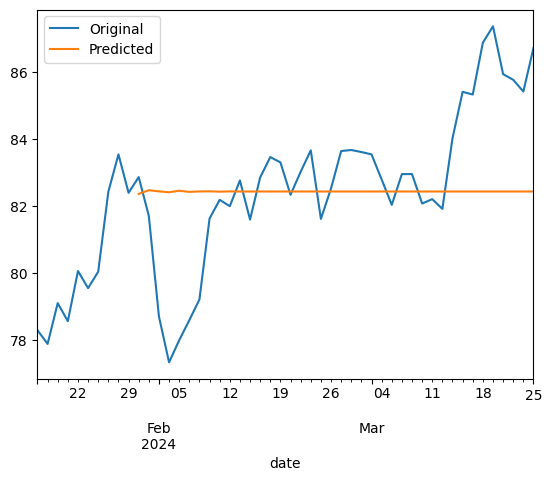

In [6]:
brent_oil_close_df[-50:].plot()